<a href="https://colab.research.google.com/github/adityasahu88/DL_PROJECTS/blob/main/VGG16_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**VGG16** is object detection and classification algorithm which is able to classify 1000 images of 1000 different categories with 92.7% accuracy. It is one of the popular algorithms for image classification and is easy to use with **transfer learning**.

**Architecture of VGG16**

- 16 layers (13 convolutional + 3 fully connected).
- Uses 3×3 convolutional filters with stride = 1.
- Uses 2×2 max pooling with stride = 2.
- Ends with three fully connected layers and a softmax layer for classification.
- Requires 224×224 RGB images as input.
- VGG16 is computationally expensive, as it has 138 million parameters.

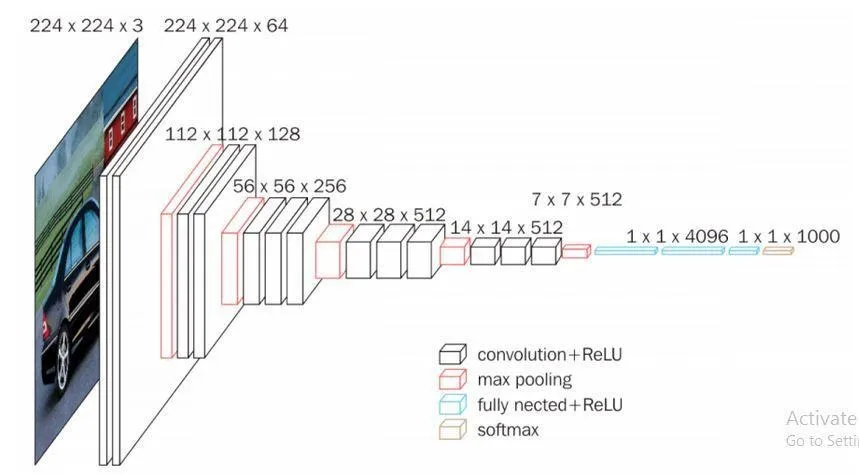

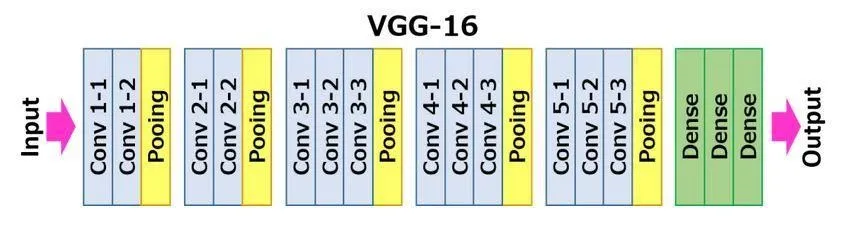

- The 16 in VGG16 refers to 16 layers that have weights.
- In VGG16 there are thirteen convolutional layers, five Max Pooling layers, and three Dense layers which sum up to 21 layers but it has only sixteen weight layers i.e., learnable parameters layer.
- VGG16 takes input tensor size as 224, 244 with 3 RGB channel

- Conv-1 Layer has 64 number of filters, Conv-2 has 128 filters, Conv-3 has 256 filters, Conv 4 and Conv 5 has 512 filters.

- Most unique thing about VGG16 is that instead of having a large number of hyper-parameters they focused on having convolution layers of 3x3 filter with stride 1 and always used the same padding and maxpool layer of 2x2 filter of stride 2.

**Transfer Learning**
- Transfer learning is a machine learning technique where a pre-trained model is used as a starting point for a new task. Instead of training a model from scratch, we reuse the knowledge gained from a large dataset and fine-tune it for our specific problem.
- A model trained on ImageNet (1.4 million images) for object recognition can be used to classify medical X-ray images with minimal additional training.
- when we pass our images first the error calculation will very high and we will freeze the convolution layers means no weights and bais values will be updated. Only the fully connected layers  weight and bias values will be updated.



- We freeze the convolutional base (base_model.trainable = False), meaning the weights and biases in the convolutional layers will not be updated during training.
- Only the fully connected (FC) layers (which we added) will be trained and updated using backpropagation.
- Initially, since the FC layers are randomly initialized, the error (loss) will be high at the start of training.
- Over epochs, the FC layers learn to map the extracted features to the correct class (cat or dog).

In [1]:
# let do classify Cats and Dogs using VGG16 and Transfer Learning in TensorFlow/Keras.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf


In [3]:
# load the vgg16 model

base_model = tf.keras.applications.VGG16(include_top=False,input_shape=(150,150,3))
base_model.trainable=False
# the weights and biases in the convolutional layers will not be updated during back propagation.
base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

**What Does include_top=False Mean?**
- By default, models like VGG16, ResNet come with fully connected (Dense) layers at the top, designed for ImageNet (1000 classes).
- Setting include_top=False removes these Dense layers.
- This lets us customize the model for our own dataset by adding new fully connected layers.

-The include_top=False parameter removes the fully connected (FC) layers from the original VGG16 model.

**What Does This Mean base_model.trainable=False ?**
- This freezes the pre-trained model's layers, meaning NO weight updates during training.
- The model retains the learned features from ImageNet (or another dataset).
- Only the newly added layers (like Dense layers) will be trained and updated.

In [4]:
# load the dataset
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle
!kaggle datasets download bhavikjikadara/dog-and-cat-classification-dataset
!unzip -q dog-and-cat-classification-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
License(s): apache-2.0
 99% 764M/775M [00:09<00:00, 194MB/s]
100% 775M/775M [00:09<00:00, 87.3MB/s]


In [5]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.1,
                                                      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

In [6]:
batch_size =64

In [7]:
train_idg = idg.flow_from_directory("PetImages",
                                    target_size =(150,150),
                                    batch_size =batch_size,
                                    subset="training")

Found 22500 images belonging to 2 classes.


In [8]:
val_idg = idg.flow_from_directory("PetImages",
                                    target_size =(150,150),
                                     batch_size =batch_size,
                                    subset="validation")

Found 2498 images belonging to 2 classes.


In [9]:
# Create the model
flat = tf.keras.layers.Flatten() (base_model.output)
dense1 = tf.keras.layers.Dense(128,activation=tf.keras.activations.relu) (flat)
dense2 =tf.keras.layers.Dense(64,activation=tf.keras.activations.relu) (dense1)
output =tf.keras.layers.Dense(2,activation=tf.keras.activations.softmax) (dense2)

final_model = tf.keras.models.Model(inputs =[ base_model.input], outputs=[output])

In [10]:
final_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,771,778 (60.16 MB)

 Trainable params: 1,057,090 (4.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

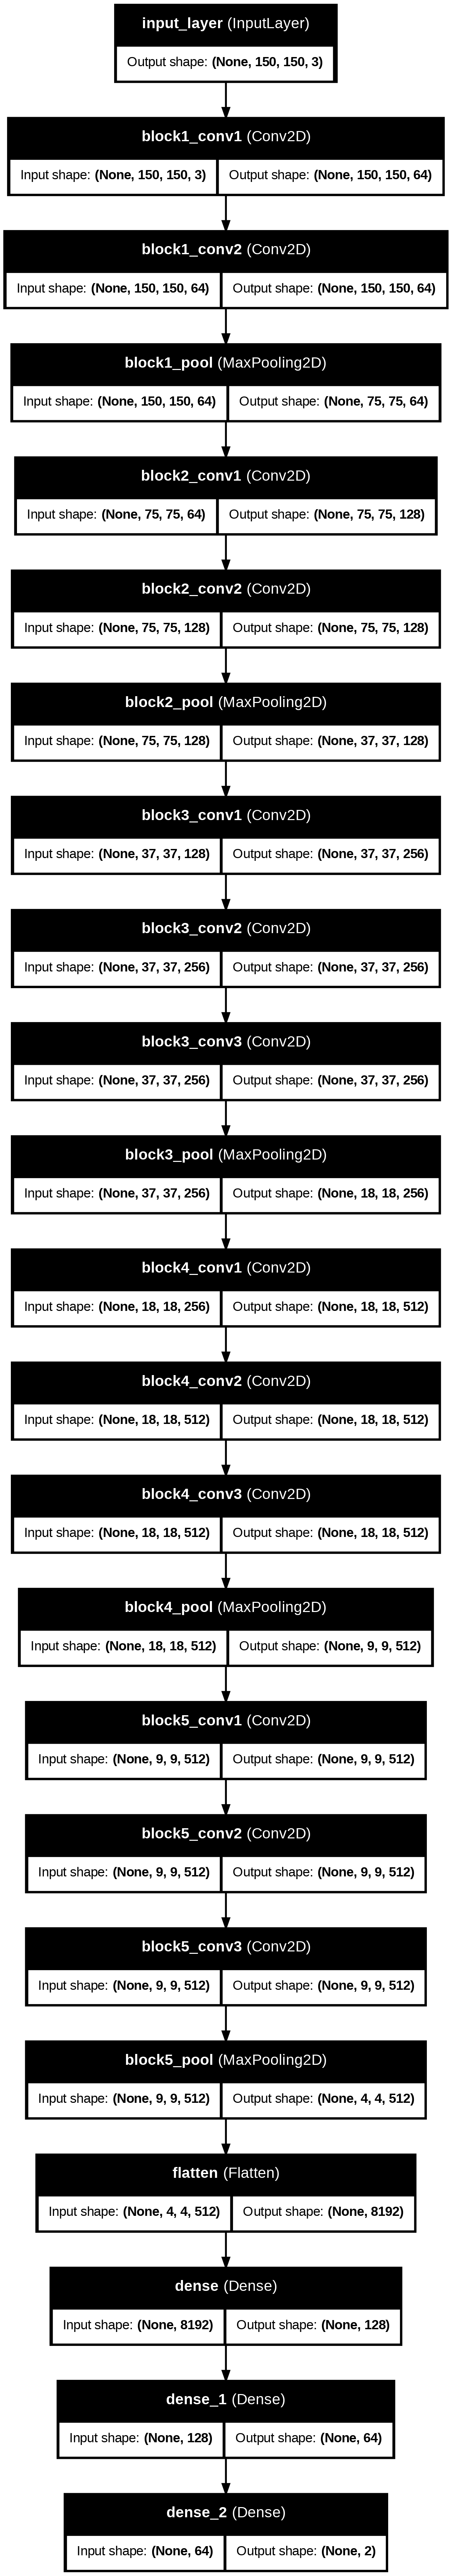

In [11]:
# plot the model
tf.keras.utils.plot_model(final_model,show_shapes=True,show_layer_names=True)

In [12]:
# compile the model
final_model.compile(optimizer =tf.keras.optimizers.SGD(),
                    loss = tf.keras.losses.categorical_crossentropy,
                    metrics=["accuracy"])

In [13]:
# fit the model
final_model.fit(train_idg,batch_size =batch_size,epochs=10,validation_data=val_idg)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 150, 150, 3))
  warnings.warn(msg)


 87/352 ━━━━━━━━━━━━━━━━━━━━ 48s 183ms/step - accuracy: 0.7156 - loss: 132.1976

/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


352/352 ━━━━━━━━━━━━━━━━━━━━ 98s 244ms/step - accuracy: 0.7760 - loss: 52.8989 - val_accuracy: 0.6982 - val_loss: 0.5496
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 79s 225ms/step - accuracy: 0.7623 - loss: 0.5523 - val_accuracy: 0.7534 - val_loss: 0.3567
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 77s 218ms/step - accuracy: 0.8056 - loss: 0.4536 - val_accuracy: 0.8531 - val_loss: 0.3466
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 222ms/step - accuracy: 0.9050 - loss: 0.3263 - val_accuracy: 0.9484 - val_loss: 0.1541
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 77s 217ms/step - accuracy: 0.9606 - loss: 0.1890 - val_accuracy: 0.9520 - val_loss: 0.2192
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 85s 225ms/step - accuracy: 0.9666 - loss: 0.1455 - val_accuracy: 0.9624 - val_loss: 0.1353
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 77s 218ms/step - accuracy: 0.9740 - loss: 0.0963 - val_accuracy: 0.9628 - val_loss: 0.1167
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 77s 218ms/step - accuracy: 0.9713 - loss: 0.0922 - va

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0., 1.]], dtype=float32)

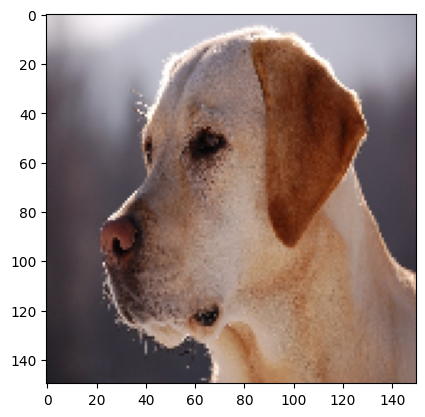

In [39]:
# lets predict the image
img = cv2.imread("images.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(150,150))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
np.round(final_model.predict(img),2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Model is predicting that the image is a Dog with 99.99% confidence.

In [20]:
train_idg.class_indices

{'Cat': 0, 'Dog': 1}